- https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial
- https://otexts.com/fpp2/stationarity.html#fig:stationary

Predicting the average google search of each keyword in the coming january(month)

# Importing packages and data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
df= pd.read_csv('multiTimeline.csv')

In [4]:
df.head()

,,,Category: All categories
Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
2004-01,100,31,47
2004-02,75,26,49
2004-03,71,24,46
2004-04,70,22,47


Here the above data is without skiprows, so all the rows displayed. Using skiprows=1 skips first row

In [18]:
df= pd.read_csv('multiTimeline.csv', skiprows=1)

In [19]:
df.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,47
1,2004-02,75,26,49
2,2004-03,71,24,46
3,2004-04,70,22,47
4,2004-05,73,23,43


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 4 columns):
Month                   192 non-null object
diet: (Worldwide)       192 non-null int64
gym: (Worldwide)        192 non-null int64
finance: (Worldwide)    192 non-null int64
dtypes: int64(3), object(1)
memory usage: 6.1+ KB


# Wrangle the data

In [22]:
df.columns

Index(['Month', 'diet: (Worldwide)', 'gym: (Worldwide)',
       'finance: (Worldwide)'],
      dtype='object')

In [23]:
df.columns=['month','diet','gym','finance']
df.head()

,month,diet,gym,finance
0,2004-01,100,31,47
1,2004-02,75,26,49
2,2004-03,71,24,46
3,2004-04,70,22,47
4,2004-05,73,23,43


Earlier .info() 'month' datatype object but we need any generic data type. so convert to datetime. set_index can take multiple input for index,pass in form of array. 'inplace' is set to true to change the actual data frame

In [24]:
df.month=pd.to_datetime(df.month)
df.set_index('month',inplace=True)
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,47
2004-02-01,75,26,49
2004-03-01,71,24,46
2004-04-01,70,22,47
2004-05-01,73,23,43


In [25]:
df.columns

Index(['diet', 'gym', 'finance'], dtype='object')

# Exploratory Data Analysis(EDA)

Text(0.5, 0, 'Year')

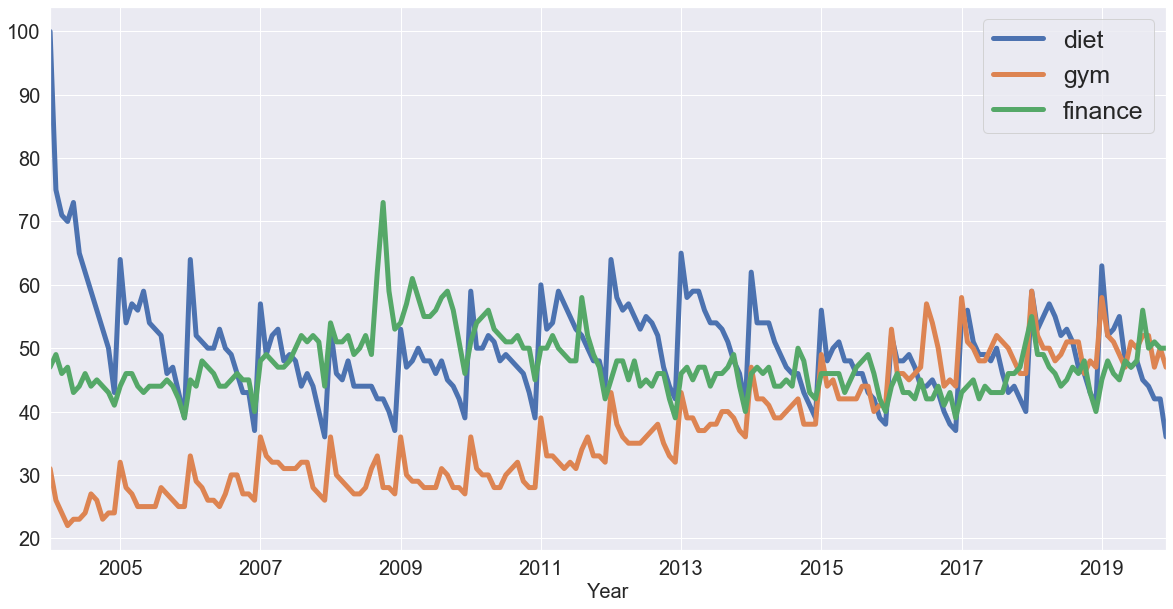

In [36]:
df.plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.legend(prop={'size':25})
plt.xlabel('Year',fontsize=20)

Text(0.5, 0, 'Year')

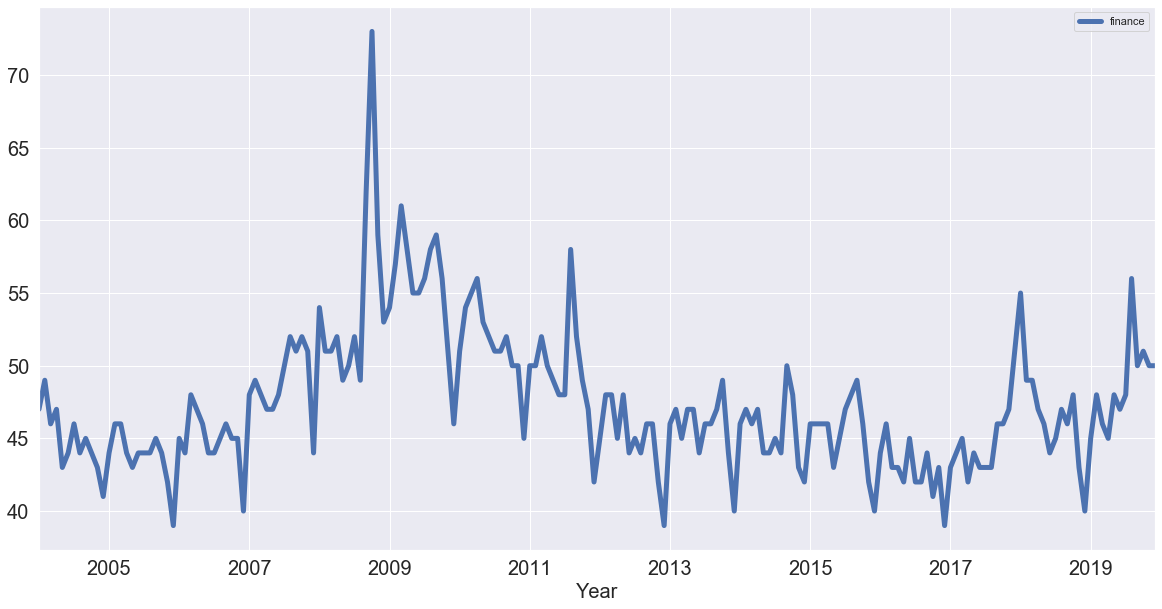

In [27]:
df[['finance']].plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('Year',fontsize=20)

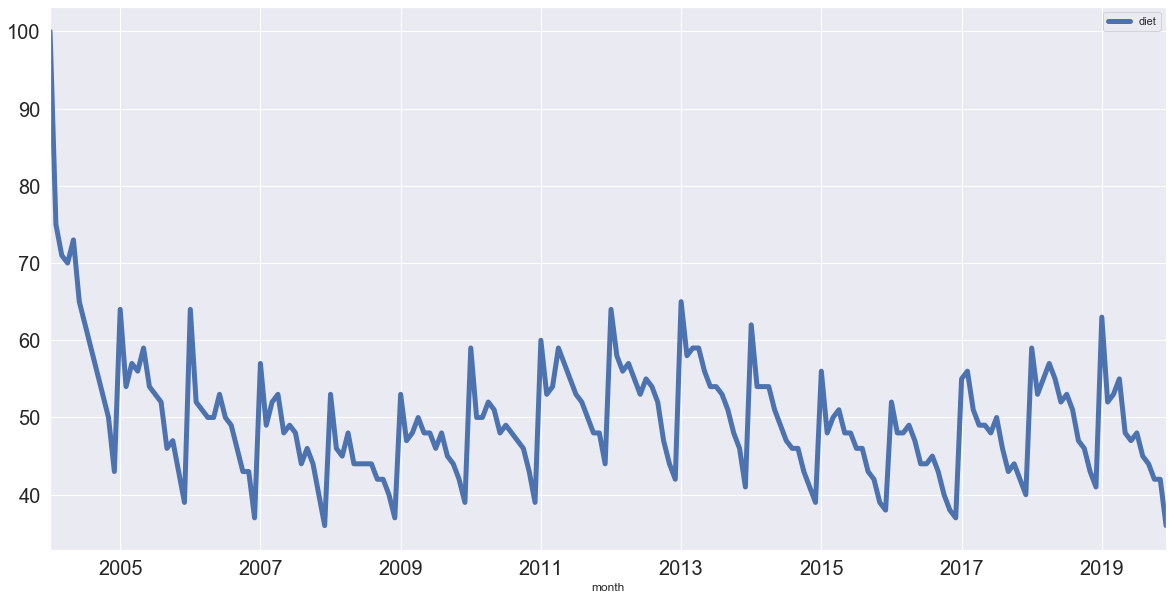

In [33]:
df[['diet']].plot(figsize=(20,10),linewidth=5,fontsize=20)

the first thing to notice is that there is seasonality: each January, there's a big jump.Also there is trend: it seems to go slightly up, then down, back up and then back down.it looks like there are trends and seasonal components to these time series.

## Identifying trends in time series

- rolling average: for each time point, you take the average of the points on either side of it. The number of points is specified by a window size.

We will calculate rolling average of 'diet' using built-in pandas(rolling()) method.

### Rolling average with 12 months window size, also called yearly seasonality

above code is used to extract 'diet' column as a DataFrame

In [39]:
df[['diet']]

,diet
month,
2004-01-01,100
2004-02-01,75
2004-03-01,71
2004-04-01,70
2004-05-01,73
...,...
2019-08-01,45
2019-09-01,44
2019-10-01,42


else you could create pandas series by the following code

In [40]:
df['diet']

month
2004-01-01    100
2004-02-01     75
2004-03-01     71
2004-04-01     70
2004-05-01     73
             ... 
2019-08-01     45
2019-09-01     44
2019-10-01     42
2019-11-01     42
2019-12-01     36
Name: diet, Length: 192, dtype: int64

method chaining, rolling of 12 months

- rolling() in python: we take a window size of k at a time and perform some desired mathematical operation on it. A window of size k means k consecutive values at a time. In a very simple case all the ‘k’ values are equally weighted.

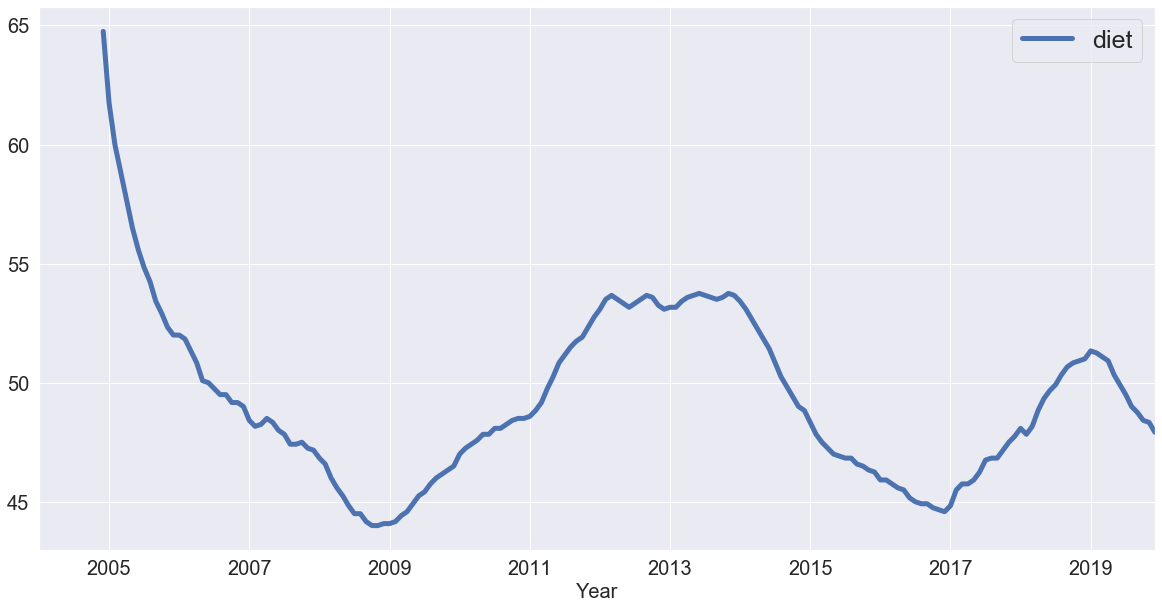

In [67]:
diet=df[['diet']]
diet.rolling(12).mean().plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.legend(prop={'size':25})

- rolling().mean() :performing rolling on the data and simultaneously getting mean.

In [58]:
z=diet.rolling(3).mean()

In [59]:
z

,diet
month,
2004-01-01,NaN
2004-02-01,NaN
2004-03-01,82.000000
2004-04-01,72.000000
2004-05-01,71.333333
...,...
2019-08-01,46.666667
2019-09-01,45.666667
2019-10-01,43.666667


-  view entire dataframe with maxcolumns and rows

In [63]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(z)

                 diet
month                
2004-01-01        NaN
2004-02-01        NaN
2004-03-01  82.000000
2004-04-01  72.000000
2004-05-01  71.333333
2004-06-01  69.333333
2004-07-01  66.666667
2004-08-01  62.000000
2004-09-01  59.000000
2004-10-01  56.000000
2004-11-01  53.000000
2004-12-01  48.666667
2005-01-01  52.333333
2005-02-01  53.666667
2005-03-01  58.333333
2005-04-01  55.666667
2005-05-01  57.333333
2005-06-01  56.333333
2005-07-01  55.333333
2005-08-01  53.000000
2005-09-01  50.333333
2005-10-01  48.333333
2005-11-01  45.333333
2005-12-01  43.000000
2006-01-01  48.666667
2006-02-01  51.666667
2006-03-01  55.666667
2006-04-01  51.000000
2006-05-01  50.333333
2006-06-01  51.000000
2006-07-01  51.000000
2006-08-01  50.666667
2006-09-01  48.333333
2006-10-01  46.000000
2006-11-01  44.000000
2006-12-01  41.000000
2007-01-01  45.666667
2007-02-01  47.666667
2007-03-01  52.666667
2007-04-01  51.333333
2007-05-01  51.000000
2007-06-01  50.000000
2007-07-01  48.333333
2007-08-01

In [73]:
y=diet.rolling(3,win_type='triang').sum()

In [74]:
y

,diet
month,
2004-01-01,NaN
2004-02-01,NaN
2004-03-01,160.5
2004-04-01,143.5
2004-05-01,142.0
...,...
2019-08-01,94.0
2019-09-01,91.0
2019-10-01,87.5


In [75]:
x=diet.rolling(3,win_type='triang').mean()
x

,diet
month,
2004-01-01,NaN
2004-02-01,NaN
2004-03-01,80.25
2004-04-01,71.75
2004-05-01,71.00
...,...
2019-08-01,47.00
2019-09-01,45.50
2019-10-01,43.75


Text(0, 0.5, 'Time')

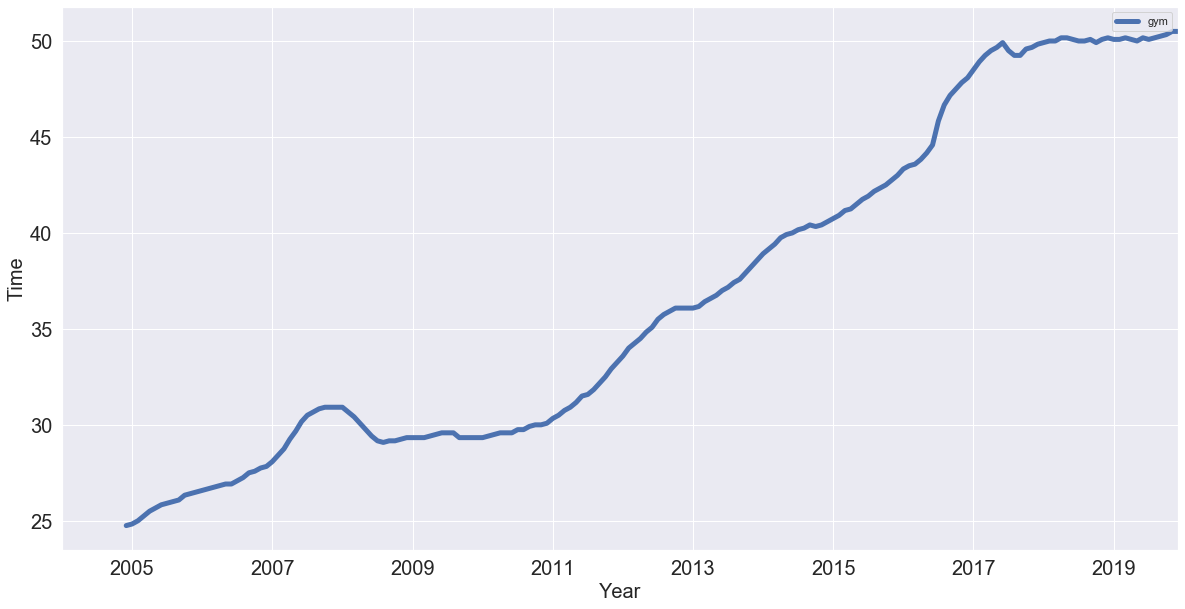

In [77]:
gym=df[['gym']]
gym.rolling(12).mean().plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Time',fontsize=20)

we have removed seasonality and upward trend is visible for gym

- gym and diet plot on single figure

Text(0.5, 0, 'Year')

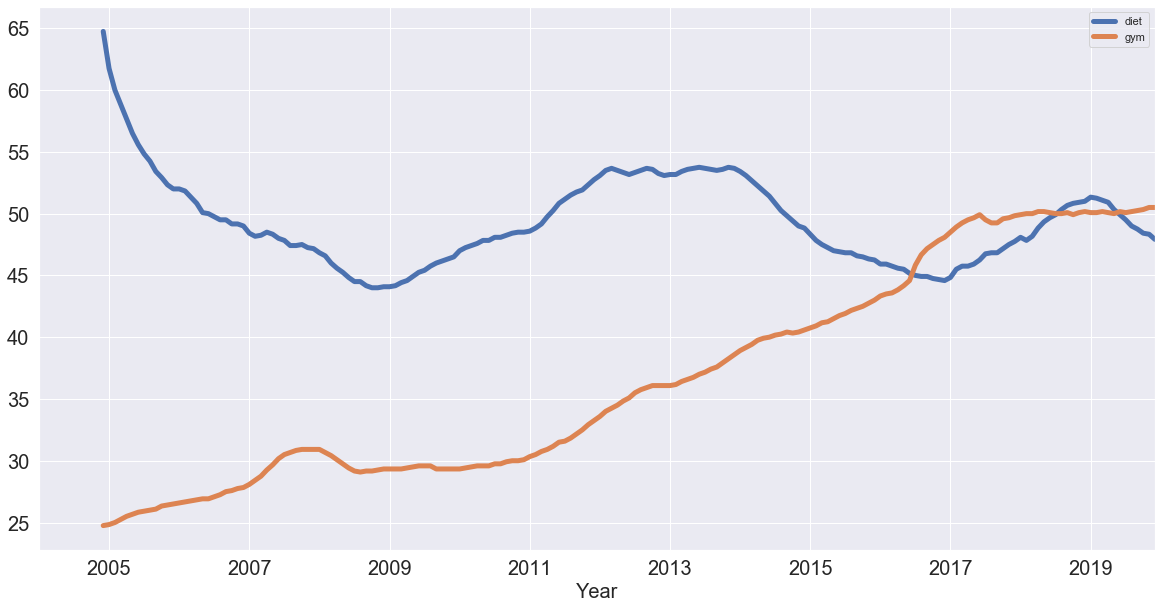

In [78]:
df_rm=pd.concat([diet.rolling(12).mean(),gym.rolling(12).mean()],axis=1)
df_rm.plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('Year',fontsize=20)

In [79]:
df_rm

,diet,gym
month,,
2004-01-01,NaN,NaN
2004-02-01,NaN,NaN
2004-03-01,NaN,NaN
2004-04-01,NaN,NaN
2004-05-01,NaN,NaN
...,...,...
2019-08-01,49.000000,50.166667
2019-09-01,48.750000,50.250000
2019-10-01,48.416667,50.333333


- Seasonality: the repetitive nature of your time series
- remove the trend from a time series, so that you can more easily investigate seasonality
- To remove the trend, you can subtract the trend you computed above (rolling mean) from the original signal

- Another way to remove the trend is called "differencing", where you look at the difference between successive data points (called "first-order differencing").
- each point is replaced by the difference between its value and the value of the previous point.

- Transformations such as logarithms can help to stabilise the variance of a time series. 
- Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.

### Stationary: A stationary series is one in which the properties – mean, variance and covariance, do not vary with time.

### First-order differencing

Text(0.5, 0, 'Year')

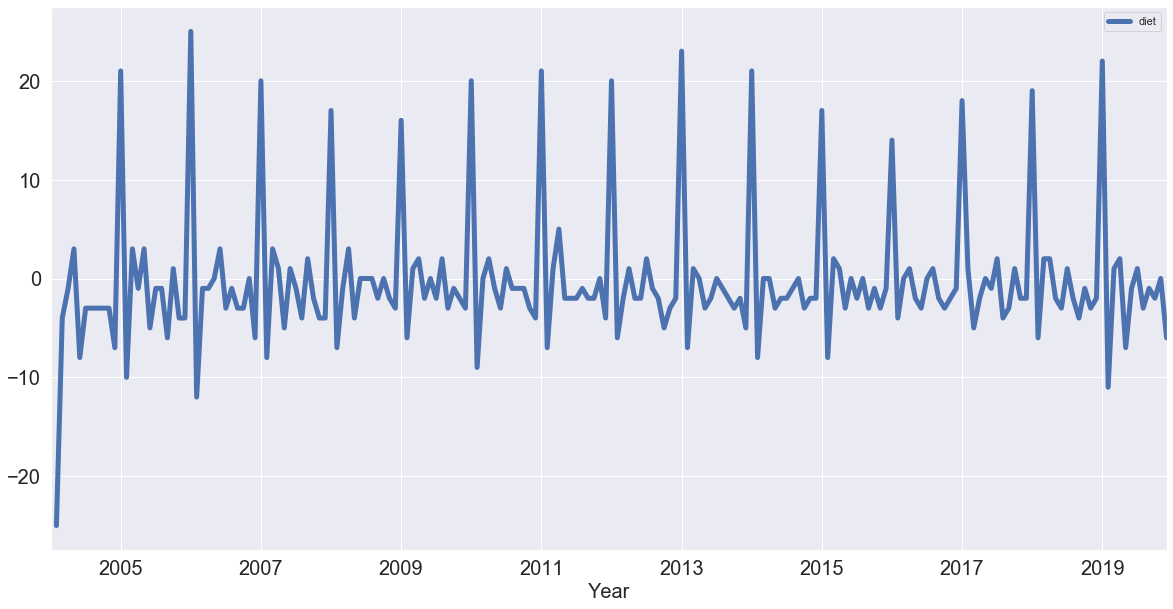

In [84]:
diet.diff().plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('Year', fontsize=20)